In [19]:
import pandas as pd

,group,instructor,quiz_average,Exam_1,Total,Grade
0,1,B,5.0,76,101.0,71.6710
1,1,B,5.0,77,102.0,72.5045
2,1,B,2.5,0,12.5,4.1625
3,1,B,5.7,92,120.5,86.1725
4,1,B,9.5,87,134.5,88.3320
...,...,...,...,...,...,...
288,13,C,4.6,33,56.0,35.1645
289,13,C,6.0,54,84.0,54.9990
290,13,C,3.0,33,48.0,32.5005
291,13,C,9.0,96,141.0,95.0010


data = pd.read_csv("~/Desktop/flashcard_/python files/Students_quizzes.csv")
data

# EDA

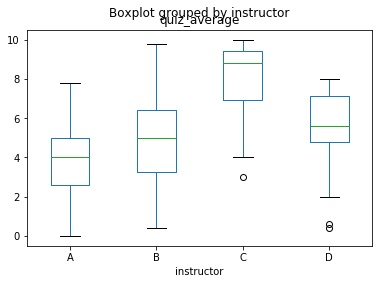

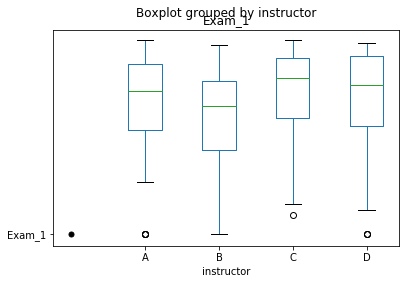

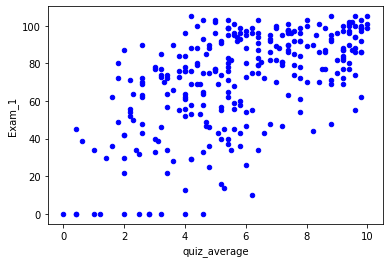

In [35]:
data.describe()
data["group"].value_counts()
data["instructor"].value_counts()
data[["instructor","quiz_average"]].groupby("instructor").mean()
data[["instructor", "Exam_1",]].groupby("instructor").mean()
data.boxplot(column="quiz_average", by="instructor", grid=False)
data.boxplot(column="Exam_1", by="instructor", grid=False)
import matplotlib.pyplot as plt
plt.scatter("quiz_average", "Exam_1", label="quiz vs exam", color="k", s=25, marker="o")
data.plot.scatter(x="quiz_average", y="Exam_1", c="blue")

# Analysis

In [38]:
data[["quiz_average","Exam_1"]].corr(method="pearson")

,quiz_average,Exam_1
quiz_average,1.000000,0.577959
Exam_1,0.577959,1.000000
